### Updates external scripts that are used

In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Imports

In [24]:
### Install these packages if they are not installed.
#!pip install mne
#!pip install yasa
#!pip install matplotlib
#!pip install edfio

# base imports
import os
import sys
import mne
import yaml
import re

# get parent directory path to be able to import from parallel directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# imports from custom scripts
import data_visualization as dv
from pre_processing import basic_mne_functions as bmf

## Access config parameters

In [25]:
with open('visualization_config.yaml') as p:
    params = yaml.safe_load(p)

## Input variables

C:/Users/andri/school/bio-informatics/internship/donders/data/human_test_data\visualizations/data_visualizations\SC4001
[WinError 183] Cannot create a file when that file already exists: 'C:/Users/andri/school/bio-informatics/internship/donders/data/human_test_data\\visualizations/data_visualizations\\SC4001'
Manually remove the directory to create a new one.
Or add created files to this directory.
Extracting EDF parameters from C:\Users\andri\school\bio-informatics\internship\donders\data\human_test_data\pre_processing\input\raw_input\SC4001E0-PSG.edf...
EDF file detected
Channel 'EEG Fpz-Cz' recognized as type EEG (renamed to 'Fpz-Cz').
Channel 'EEG Pz-Oz' recognized as type EEG (renamed to 'Pz-Oz').
Channel 'EOG horizontal' recognized as type EOG (renamed to 'horizontal').
Channel 'Resp oro-nasal' recognized as type RESP (renamed to 'oro-nasal').
Channel 'EMG submental' recognized as type EMG (renamed to 'submental').
Channel 'Temp rectal' recognized as type TEMP (renamed to 'rectal

c:\Users\andri\school\bio-informatics\internship\donders\vsc\Human_SleepSCoring\DilonAndriesse\pre_processing\basic_mne_functions.py:15: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(
c:\Users\andri\school\bio-informatics\internship\donders\vsc\Human_SleepSCoring\DilonAndriesse\pre_processing\basic_mne_functions.py:15: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(


First sleep starts at: 30630.0
Last sleep ends at: 52260.0
Cropping raw: 28830.0 - 54060.0
Cropping finished.


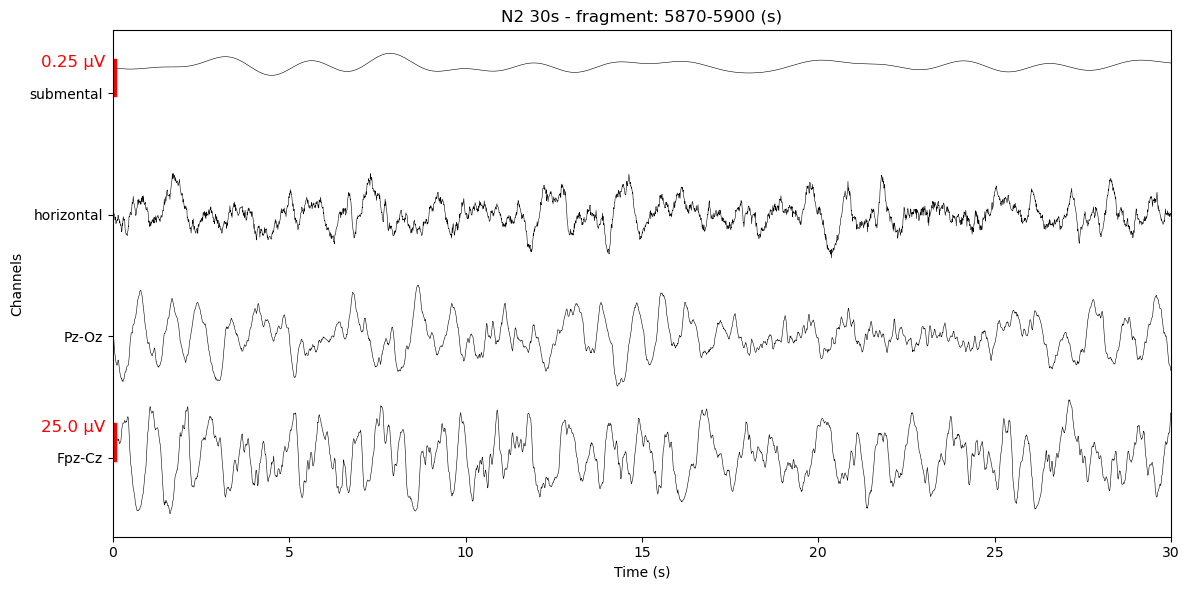

In [32]:
# variables
epoch = params['variables']['epoch']
wake_time = params['variables']['wake_time']
channels = params['variables']['channels']
subject = params['variables']['subject']
pattern = re.compile(subject)

# partial paths
path_to_data = params['paths']['data']
path_to_raw = params['paths']['raw']
path_to_anno = params['paths']['anno']
path_to_bandpower = params['paths']['bandpower']
path_to_output = params['paths']['data_vis']

# paths
raw_path = os.path.join(path_to_data, path_to_raw)
raw_file = os.path.join(
    raw_path, 
    next(
        (file for file in os.listdir(raw_path) if subject in file), 
        None
    )
)

anno_path = os.path.join(path_to_data, path_to_anno)
anno_file = os.path.join(
    anno_path, 
    next(
        (file for file in os.listdir(anno_path) if subject in file), 
        None
    )
)

bandpower_file = os.path.join(path_to_data, path_to_bandpower, f"{subject}_bandpower.csv")

output_path = os.path.join(path_to_data, path_to_output, subject)
print(output_path)
# output_path = output_path + "/"
# try to create directory
try:
    os.mkdir(output_path)
except OSError as e:
    print(e)
    print("Manually remove the directory to create a new one.\nOr add created files to this directory.")


# visualize the data of the different channels in dataset.
raw_data = bmf.read_raw_psg(raw_file, channels)
anno_data = bmf.extract_annotation(anno_file, raw_data)
cropped_raw_data = bmf.crop_data(raw_data, wake_time)
#mne.export.export_raw("test_edf_3.edf", cropped_raw_data, fmt="edf")


### comment this function to skip the interactive PSG plot
dv.plot_data(raw_data, output_path)

Used Annotations descriptions: [np.str_('Sleep stage 1'), np.str_('Sleep stage 2'), np.str_('Sleep stage 3'), np.str_('Sleep stage 4'), np.str_('Sleep stage R'), np.str_('Sleep stage W')]


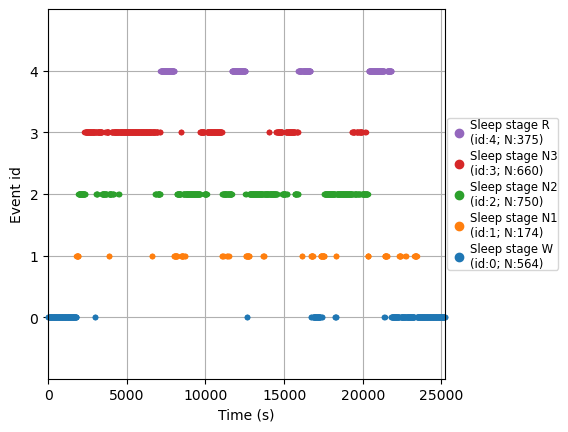

<Figure size 640x480 with 0 Axes>

In [33]:
# visualize the distribution of epochs spend in certain sleep state
sleep_events = bmf.create_sleep_events(cropped_raw_data, epoch)
dv.plot_events(sleep_events, raw_data, output_path)

c:\Users\andri\miniconda3\envs\rodent_model\Lib\site-packages\yasa\plotting.py:89: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  freq_str = pd.tseries.frequencies.to_offset(pd.Timedelta(1 / sf_hypno, "S")).freqstr
03-Oct-25 09:54:56 | WARNING | Hypnogram is SHORTER than data by 0.01 seconds. Padding hypnogram with last value to match data.size.


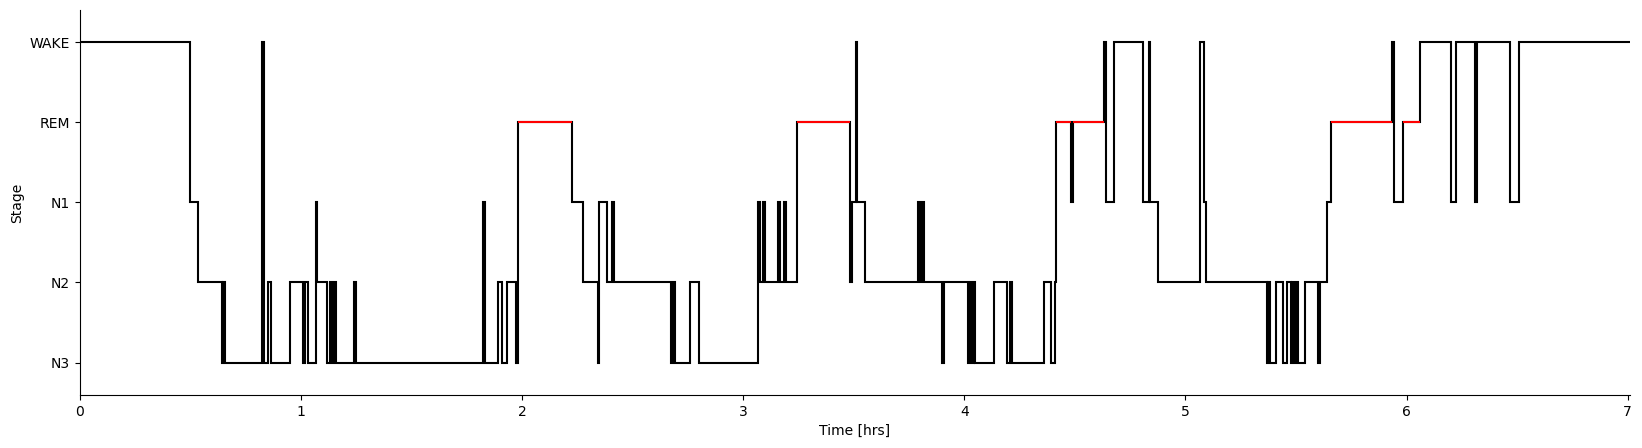

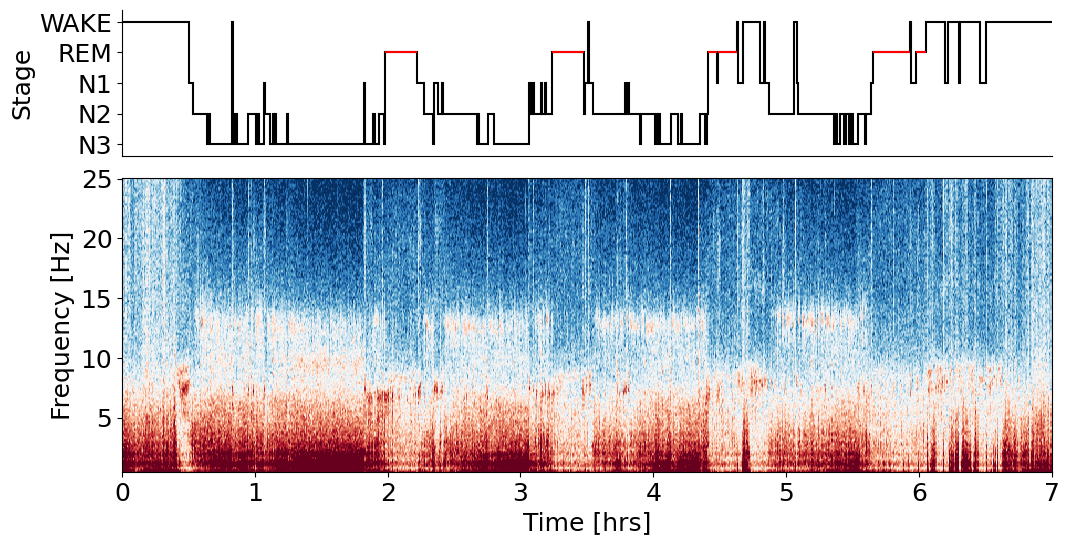

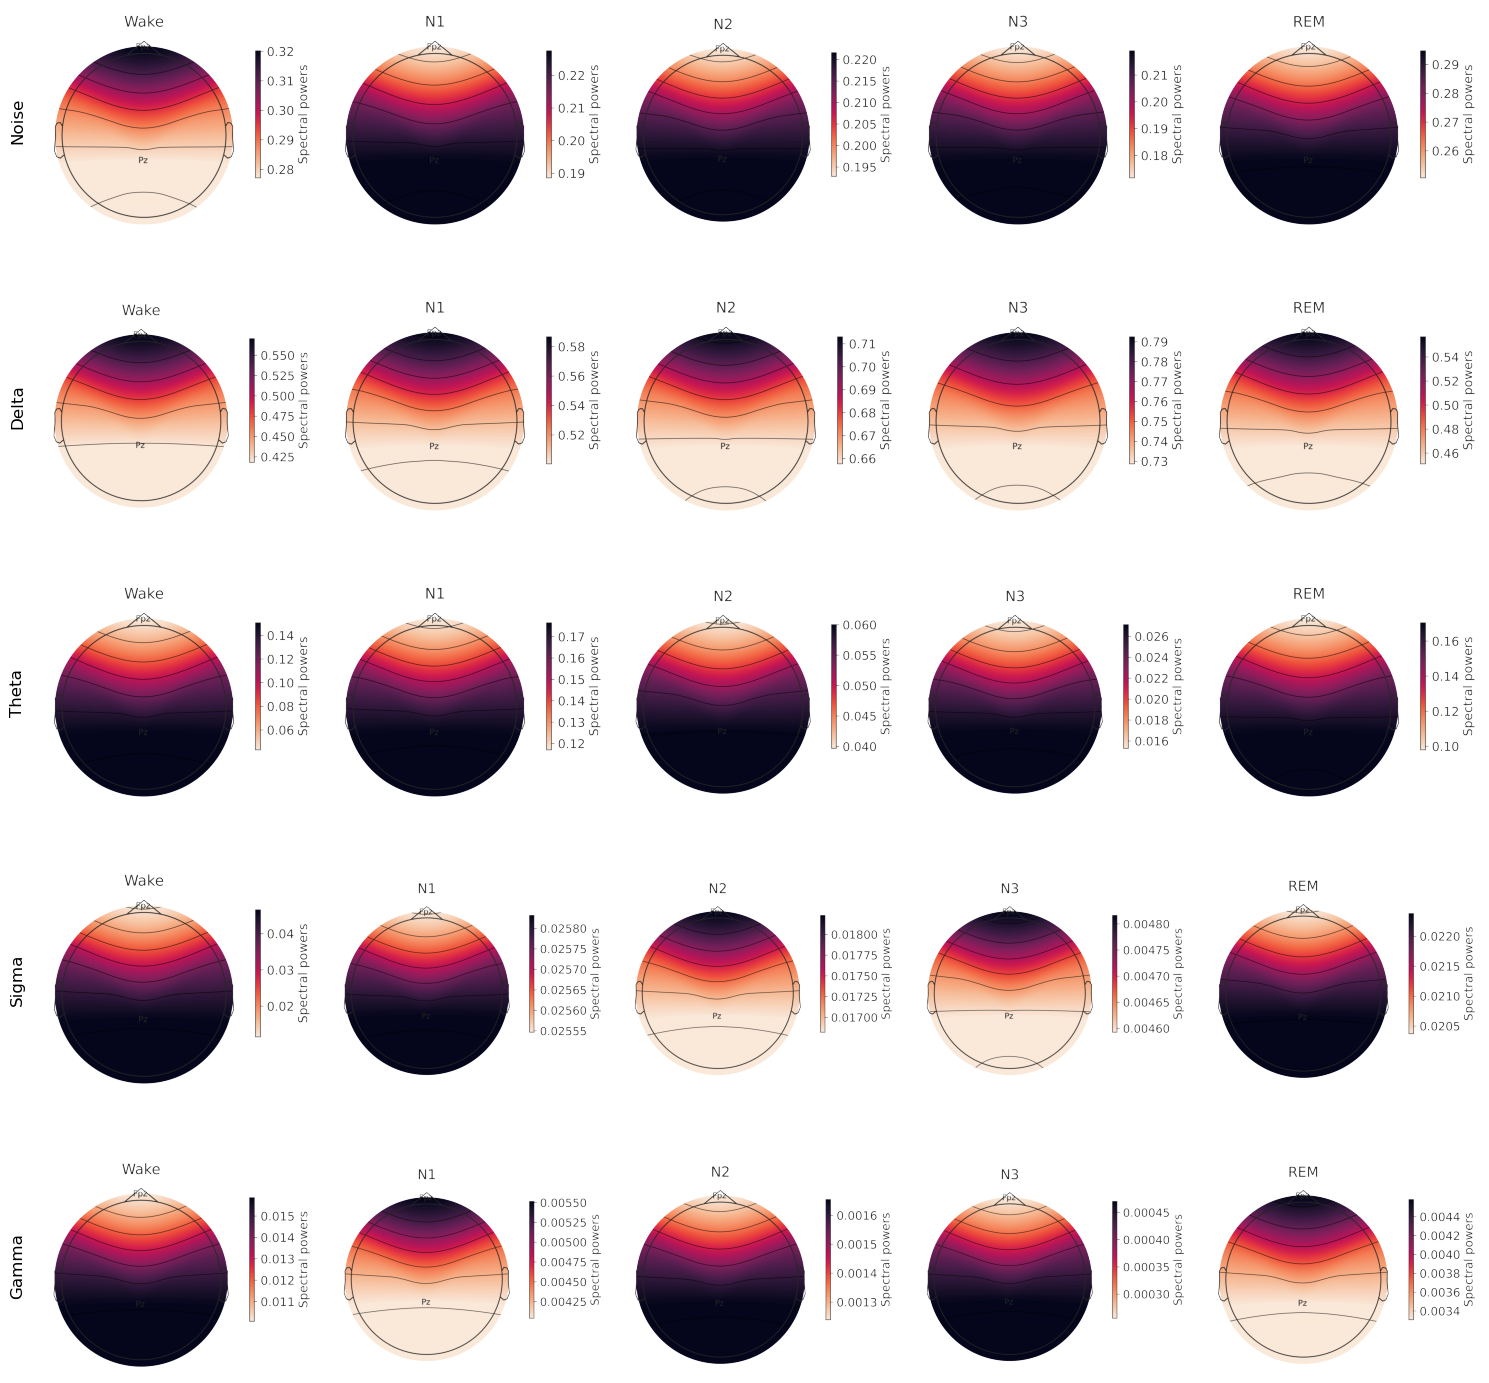

In [34]:
# yasa visualization of hypnogram and spectrogram plot
hypno_up = dv.hypnogram_vis(cropped_raw_data, sleep_events, output_path)
dv.calc_bandpower(cropped_raw_data, hypno_up, bandpower_file, output_path)